## Present day vs future RF plots

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from matplotlib import rcParams
import pandas as pd
import cftime
import glob
import os

In [2]:
rcParams['font.size'] = 20
plotdir = '/div/nac/users/zofias/plots/ACACIA'

In [3]:
x_labels = ['LMDZ-INCA','MOZART','OsloCTM3','EMAC']
exps = ['SSP1', 'SSP3', 'Present']
				
SSP1_100 =      [27.45,	24.1, 19.256,0]
SSP3_100 =      [50.31,	41.05, 40.52, 33.65]
Present_100 =   [31.413, 30.4227, 23.9016, 17.6609]

data_o3rf = pd.DataFrame([Present_100,SSP1_100,SSP3_100],columns=x_labels,index=exps)

#SSP1 - 20% All SSP1 BG	[5.49,	4.82,	3.634399414,	0]
#SSP3 - 20% All SSP3 BG	[9.03,	8.21,	8.104,	6.73]

In [4]:
SSP1_100_nox = [48.02938529,	42.16787561,	33.69248871,0]	
SSP3_100_nox = [43.40764071,	35.41808092,	34.9607951,	29.03333552]
Present_100_nox = [42.03155632,	40.70650458,	31.98107301,	23.63082523]

data_o3rf_noxscaled = pd.DataFrame([Present_100_nox, SSP1_100_nox, SSP3_100_nox],index=exps, columns=x_labels)#,index=exps)

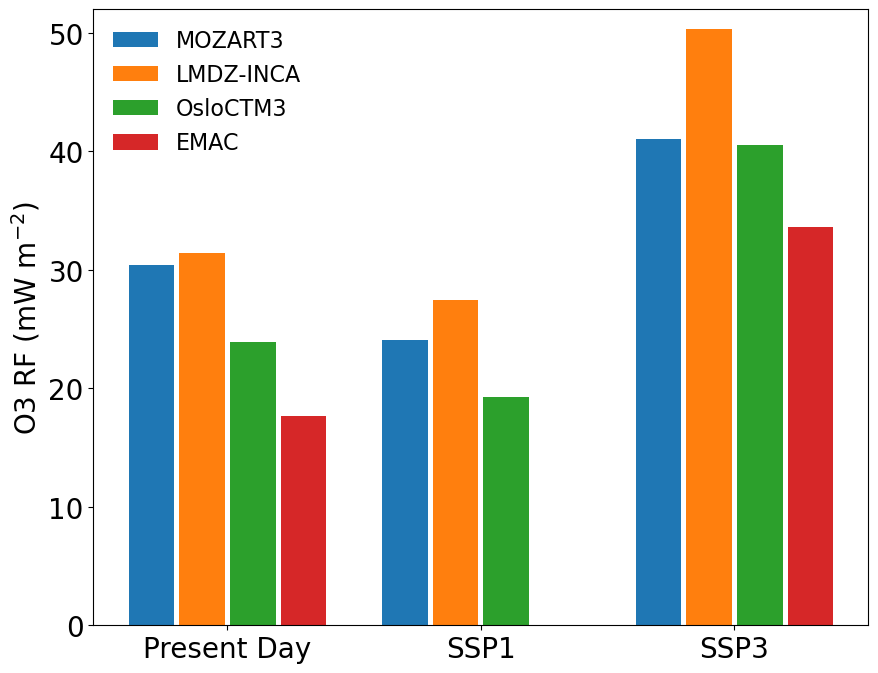

<Figure size 640x480 with 0 Axes>

In [5]:
def bar_plot(ax, data, colors=True, total_width=0.8, single_width=1, legend=True, x_axis=True, x_ticks=True, x_label=True, x_tick_labels=True, y_axis=True, y_lim=True, y_ticks=True, y_tick_labels=True):
    """Draws a bar plot with multiple bars per data point.
 
    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.
 
    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.
 
        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }
 
    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)
 
    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.
 
    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.
 
    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """
 
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
 
    # Number of bars per group
    n_bars = len(data)
 
    # The width of a single bar
    bar_width = total_width / n_bars
 
    if colors:
        colors = ['C0','C1','C2','C3']#['#9D7DB2','#00aa78','#9398D2'] # lighter blue '#7896ff', medium purple '#9D7DB2' darker purple '#9398D2', purple , # darker purple '#906388'
        #colors = ['#3250c8', '#00785f']
 
    # List containing handles for the drawn bars, used for the legend
    bars = []
    negative = False
    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
 
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            if not negative and y<0:
                negative = True
        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
 
    
 
    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc='upper left', frameon=False, fontsize=16)
 
    if negative: 
        ax.axhline(color='k', linewidth=0.5)
 
    if x_axis:
        ax.set_xlabel('Component', fontsize=20, labelpad=6)
 
    if x_ticks:
        ax.set_xticks(np.arange(len(x_labs_plot)))
 
    if x_tick_labels:
        ax.set_xticklabels(x_labs_plot, fontsize = 20)
 
    if y_axis:
        ax.set_ylabel('O3 RF (mW m$^{-2}$)', fontsize=20)
 
    if y_lim:
        ax.set_ylim(0, 52)
 

 
if __name__ == "__main__":
    # Usage example:
    datax = {
        "MOZART3": data_o3rf['MOZART'],
        "LMDZ-INCA": data_o3rf['LMDZ-INCA'],
        "OsloCTM3": data_o3rf['OsloCTM3'],
        "EMAC": data_o3rf['EMAC'],

    }
 
    #colors = ['#9D7DB2','#00aa78'] # blue '#7896ff', medium purple  '#9D7DB2' purple '#9398D2',
    x_labs_plot =['Present Day','SSP1','SSP3']
    fig, ax = plt.subplots(figsize=(10,8))
    bar_plot(ax, datax, colors=True, total_width=.8, single_width=.9, legend = True, x_axis=False, x_ticks=True, x_label=True, x_tick_labels=True, y_axis=True,  y_lim=True, y_ticks=True, y_tick_labels=True)
    #plt.title('Ozone RF impact of 20% reduction')
    plt.show()
    #fig.savefig('manuscript/figure_1a.pdf')
    plt.savefig(f'{plotdir}/ACACIA_O3RF_bar_Fig2a.pdf',format='pdf',bbox_inches='tight')

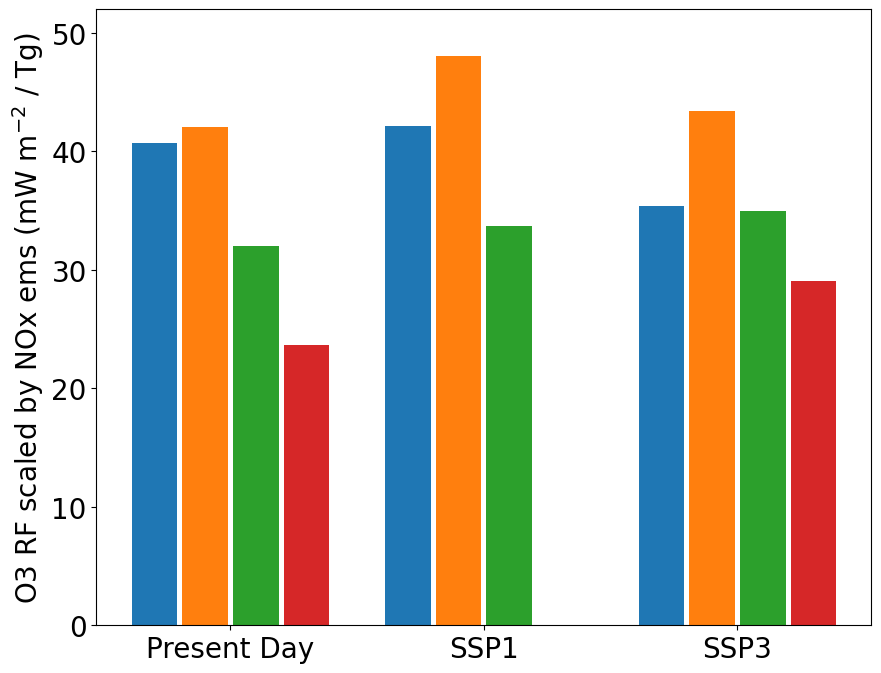

<Figure size 640x480 with 0 Axes>

In [6]:
def bar_plot(ax, data, colors=True, total_width=0.8, single_width=1, legend=True, x_axis=True, x_ticks=True, x_label=True, x_tick_labels=True, y_axis=True, y_lim=True, y_ticks=True, y_tick_labels=True):
    """Draws a bar plot with multiple bars per data point.
 
    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.
 
    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.
 
        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }
 
    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)
 
    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.
 
    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.
 
    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """
 
    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
 
    # Number of bars per group
    n_bars = len(data)
 
    # The width of a single bar
    bar_width = total_width / n_bars
 
    if colors:
        colors = ['C0','C1','C2','C3']#['#9D7DB2','#00aa78','#9398D2'] # lighter blue '#7896ff', medium purple '#9D7DB2' darker purple '#9398D2', purple , # darker purple '#906388'
        #colors = ['#3250c8', '#00785f']
 
    # List containing handles for the drawn bars, used for the legend
    bars = []
    negative = False
    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
 
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            if not negative and y<0:
                negative = True
        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])
 
    
 
    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc='upper left', frameon=False, fontsize=16)
 
    if negative: 
        ax.axhline(color='k', linewidth=0.5)
 
    if x_axis:
        ax.set_xlabel('Component', fontsize=20, labelpad=6)
 
    if x_ticks:
        ax.set_xticks(np.arange(len(x_labels)))
 
    if x_tick_labels:
        ax.set_xticklabels(x_labels, fontsize = 20)
 
    if y_axis:
        ax.set_ylabel('O3 RF scaled by NOx ems (mW m$^{-2}$ / Tg)', fontsize=20)
 
    if y_lim:
        ax.set_ylim(0, 52)
 

datay = {
        "MOZART3": data_o3rf_noxscaled['MOZART'],
        "LMDZ-INCA": data_o3rf_noxscaled['LMDZ-INCA'],
        "OsloCTM3": data_o3rf_noxscaled['OsloCTM3'],
        "EMAC": data_o3rf_noxscaled['EMAC']
    }
 
#colors = ['#9D7DB2','#00aa78'] # blue '#7896ff', medium purple  '#9D7DB2' purple '#9398D2',
x_labels = ['Present Day','SSP1','SSP3']
fig, ax = plt.subplots(figsize=(10,8))
bar_plot(ax, datay, colors=True, total_width=.8, single_width=.9, legend = False, x_axis=False, x_ticks=True, x_label=True, x_tick_labels=True, y_axis=True,  y_lim=True, y_ticks=True, y_tick_labels=True)
#plt.title('Ozone RF impact of 20% reduction')
plt.show()
plt.savefig(f'{plotdir}/ACACIA_O3RF_noxscaled_Fig2b.pdf',format='pdf',bbox_inches='tight')